Câu 1: Thống kê mô tả (8 điểm, CLO 1)

a. (2 điểm) Tìm hiểu thông tin về bộ dữ liệu và các thuộc tính của bộ dữ liệu
Bộ dữ liệu gồm những cột nào?
Kiểu dữ liệu của từng cột trong bộ dữ liệu là gì?
Có bao nhiêu giá trị bị thiếu trong mỗi cột?
Phân phối của các giá trị trong từng cột như thế nào? (ví dụ: điểm trung bình, điểm cao nhất, điểm thấp nhất)

b. (2 điểm) Lọc dữ liệu thỏa mãn yêu cầu số 1
Lọc ra danh sách các thí sinh có điểm tổng >= X điểm (ví dụ: >= 24 điểm).
Lọc ra các thí sinh có điểm 3 môn theo khối A (Toán, Lý, Hóa) >= 18 điểm.
Lọc ra danh sách thí sinh có điểm thấp nhất ở từng môn học.

c. (2 điểm) Lọc dữ liệu thỏa mãn yêu cầu số 2
Lọc danh sách thí sinh theo khu vực (ví dụ: chỉ lấy dữ liệu từ Hà Nội).
Lọc danh sách thí sinh có ít nhất một môn đạt điểm tuyệt đối (10 điểm).
Lọc danh sách thí sinh có ít nhất một môn bị điểm liệt (<= 1 điểm).

d. (2 điểm) Trực quan hóa dữ liệu đã cho
Biểu đồ phân phối điểm của từng môn học.
Biểu đồ so sánh số lượng thí sinh đạt các mức điểm tổng khác nhau.
Biểu đồ số lượng thí sinh đạt điểm liệt theo từng môn học.

Câu 2: Mô phỏng mẫu ngẫu nhiên (2 điểm, CLO 2)

a. Sử dụng hàm random để mô phỏng nhiều mẫu ngẫu nhiên
Lấy mẫu ngẫu nhiên 1000 thí sinh từ tập dữ liệu gốc.
Lấy mẫu ngẫu nhiên 500 thí sinh đạt điểm tổng cao nhất.
Lấy mẫu ngẫu nhiên 300 thí sinh có ít nhất một môn bị điểm liệt.

b. Tổng hợp các đặc trưng của các mẫu ngẫu nhiên vừa tạo và đưa ra nhận xét
Trung bình điểm từng môn của các mẫu so với toàn bộ dữ liệu.
Phân phối điểm tổng của các mẫu.
Nhận xét về sự khác biệt giữa các mẫu so với tập dữ liệu gốc.

In [93]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [94]:
# 1a. (2 điểm) Tìm hiểu thông tin về bộ dữ liệu và các thuộc tính của bộ dữ liệu
df = pd.read_csv('diem_thi_thpt_2024.csv')
df = df.fillna(0)
print(df.head())
print('*'*100)

# Bộ dữ liệu gồm những cột nào?
print(df.columns)
print('*'*100)

# Kiểu dữ liệu của từng cột trong bộ dữ liệu là gì?
print(df.info())
print('*'*100)

# Có bao nhiêu giá trị bị thiếu trong mỗi cột?
print(df.isnull().sum())
print('*'*100)

# Phân phối của các giá trị trong từng cột như thế nào? (ví dụ: điểm trung bình, điểm cao nhất, điểm thấp nhất)
print(df.describe())

       sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   8.4     6.75        8.0     6.0     5.25       5.0     0.00   
1  1000002   8.6     8.50        7.2     0.0     0.00       0.0     7.25   
2  1000003   8.2     8.75        8.2     0.0     0.00       0.0     7.25   
3  1000004   4.8     8.50        7.4     0.0     0.00       0.0     7.00   
4  1000005   8.6     9.00        7.8     0.0     0.00       0.0     9.00   

   dia_li  gdcd ma_ngoai_ngu  
0    0.00  0.00           N1  
1    6.00  8.00           N1  
2    7.25  8.75           N1  
3    6.00  7.50           N1  
4    8.75  8.50           N1  
****************************************************************************************************
Index(['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc',
       'lich_su', 'dia_li', 'gdcd', 'ma_ngoai_ngu'],
      dtype='object')
****************************************************************************************************
<

In [95]:
## 1.b Lọc dữ liệu thỏa mãn yêu cầu số 1

# Lọc ra danh sách các thí sinh có điểm tổng >= X điểm (ví dụ: >= 24 điểm).
df['tong_diem'] = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].sum(axis=1, skipna=True) # axis=1/0: áp dụng theo cột/dòng
tongdiem_tren24 = df[df['tong_diem'] >= 24]
print("Thí sinh có điểm tổng >= 24:")
print(tongdiem_tren24[['sbd', 'tong_diem']].head(5))
print('*'*100)

# Lọc ra các thí sinh có điểm 3 môn theo khối A (Toán, Lý, Hóa) >= 18 điểm.
df['khoi_a'] = df[['toan', 'vat_li', 'hoa_hoc']].sum(axis=1, skipna=True)
khoi_a_tren18 = df[df['khoi_a'] >= 18]
print("Thí sinh có điểm 3 môn theo khối A >= 18:")
print(khoi_a_tren18[['sbd', 'khoi_a']].head(5))
print('*'*100)

# Thí sinh có điểm thấp nhất ở từng môn
# Thí sinh có điểm thấp nhất ở từng môn
print("\nDanh sách thí sinh có điểm thấp nhất ở từng môn:")
for column in ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']:
    min_score = df[column].min()  # Tìm điểm thấp nhất
    min_student = df.loc[df[column].idxmin()][['sbd', column]]  # Tìm thí sinh có điểm thấp nhất
    print(f"Thí sinh {min_student['sbd']} - Tên môn {column} - Số điểm {min_score if not np.isnan(min_score) else 'NaN'}")
print("*" * 100)

Thí sinh có điểm tổng >= 24:
       sbd  tong_diem
0  1000001      39.40
1  1000002      45.55
2  1000003      48.40
3  1000004      41.20
4  1000005      51.65
****************************************************************************************************
Thí sinh có điểm 3 môn theo khối A >= 18:
        sbd  khoi_a
0   1000001   19.65
8   1000009   20.70
10  1000011   21.70
16  1000017   18.25
17  1000018   22.70
****************************************************************************************************

Danh sách thí sinh có điểm thấp nhất ở từng môn:
Thí sinh 1000022 - Tên môn toan - Số điểm 0.0
Thí sinh 1000191 - Tên môn ngu_van - Số điểm 0.0
Thí sinh 1000007 - Tên môn ngoai_ngu - Số điểm 0.0
Thí sinh 1000002 - Tên môn vat_li - Số điểm 0.0
Thí sinh 1000002 - Tên môn hoa_hoc - Số điểm 0.0
Thí sinh 1000002 - Tên môn sinh_hoc - Số điểm 0.0
Thí sinh 1000001 - Tên môn lich_su - Số điểm 0.0
Thí sinh 1000001 - Tên môn dia_li - Số điểm 0.0
Thí sinh 1000001 - Tên môn gdcd - S

In [ ]:
# Lọc dữ liệu thỏa mãn yêu cầu số 2
# Lọc danh sách thí sinh theo khu vực (ví dụ: chỉ lấy dữ liệu từ Hà Nội).
""" hanoi_students = df[df['khu_vuc'] == 'Hà Nội']
print("Danh sách thí sinh từ Hà Nội:")
print(hanoi_students[['sbd', 'khu_vuc', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].head(5))
print("*" * 100) """

# Lọc danh sách thí sinh có ít nhất một môn đạt điểm tuyệt đối (10 điểm).
df['co_diem_10'] = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].eq(10).any(axis=1)
students_with_10 = df[df['co_diem_10']]
print("Danh sách thí sinh có ít nhất một môn đạt 10 điểm:")
print(students_with_10[['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].head(5))
print("*" * 100)

# Lọc danh sách thí sinh có ít nhất một môn bị điểm liệt (<= 1 điểm).
df['co_diem_liet'] = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].le(1).any(axis=1)
students_with_liet = df[df['co_diem_liet']]
print("Danh sách thí sinh có ít nhất một môn bị điểm liệt (<= 1):")
print(students_with_liet[['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].head(5))
print("*" * 100)

Danh sách thí sinh có ít nhất một môn đạt 10 điểm:
         sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
7    1000008   8.2     9.00        9.0     0.0      0.0       0.0     8.00   
118  1000119   7.8     9.50       10.0     0.0      0.0       0.0     7.50   
301  1000304   8.8     9.00       10.0     0.0      0.0       0.0     9.75   
530  1000536   8.6     9.25       10.0     0.0      0.0       0.0     7.75   
608  1000614   8.0     9.00        8.8     0.0      0.0       0.0     8.00   

     dia_li   gdcd  
7      8.25  10.00  
118    9.00   9.00  
301    9.25   9.25  
530    8.50   8.50  
608   10.00   8.75  
****************************************************************************************************
Danh sách thí sinh có ít nhất một môn bị điểm liệt (<= 1):
       sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   8.4     6.75        8.0     6.0     5.25       5.0     0.00   
1  1000002   8.6     8.50        7.2     0

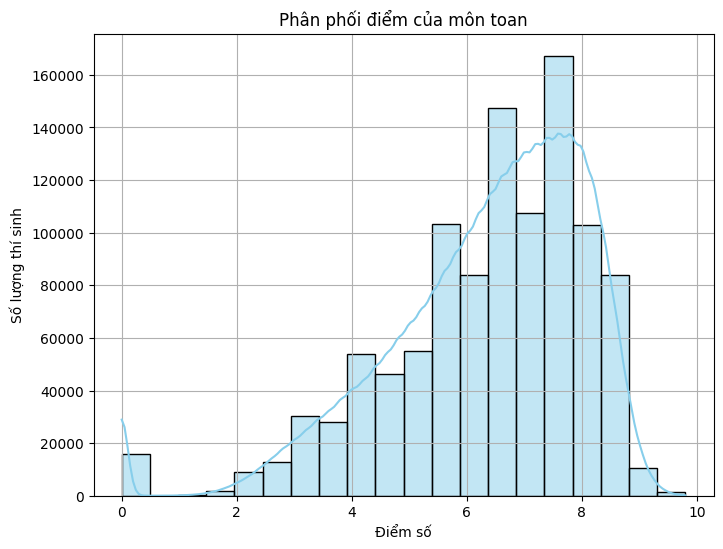

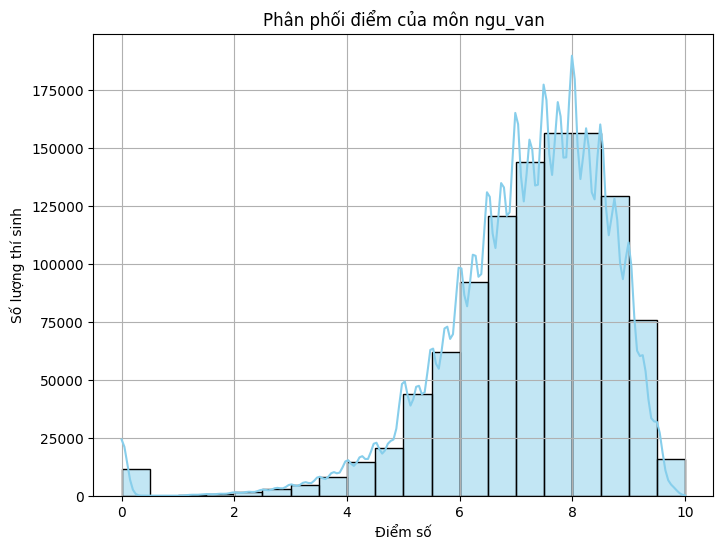

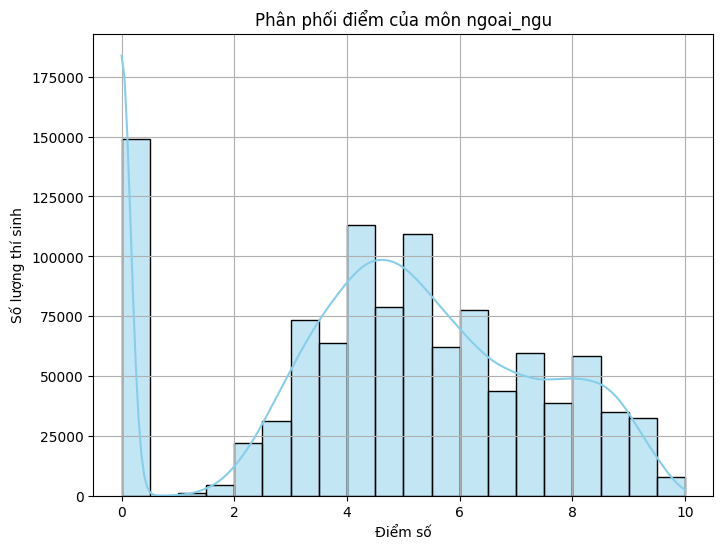

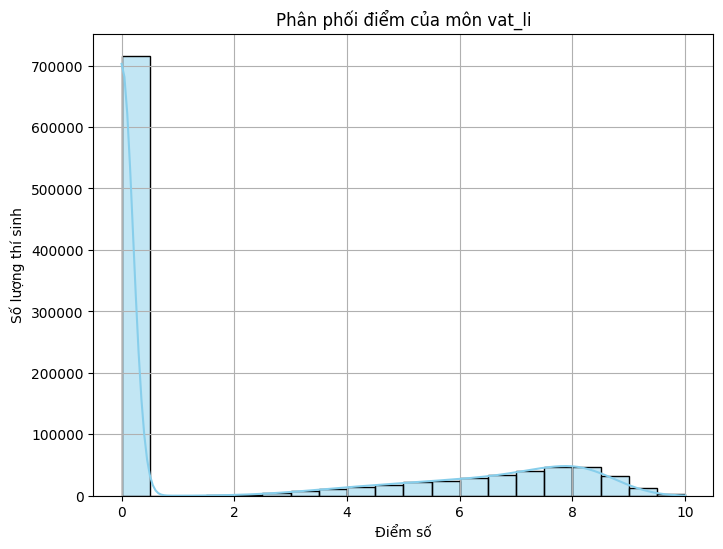

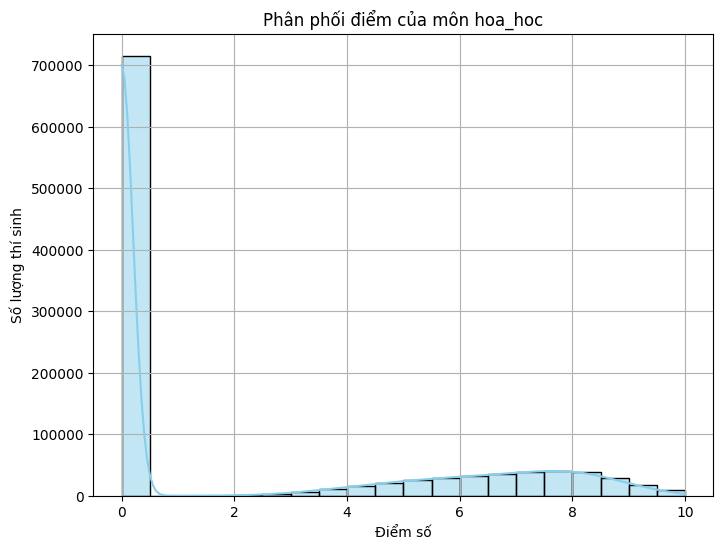

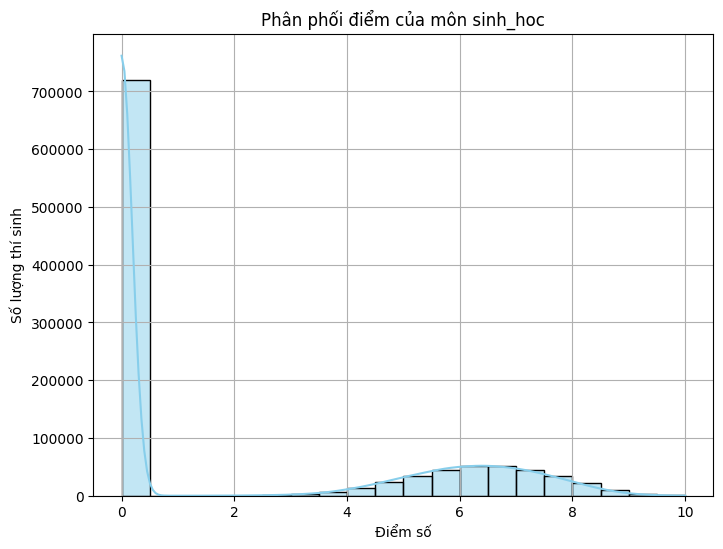

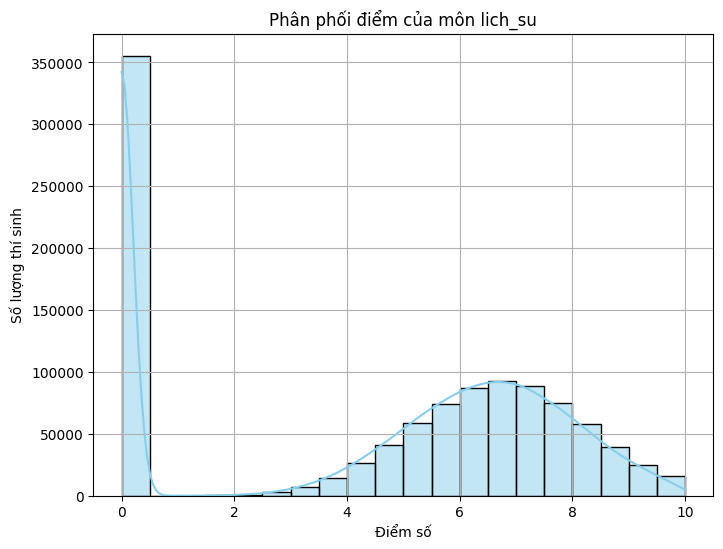

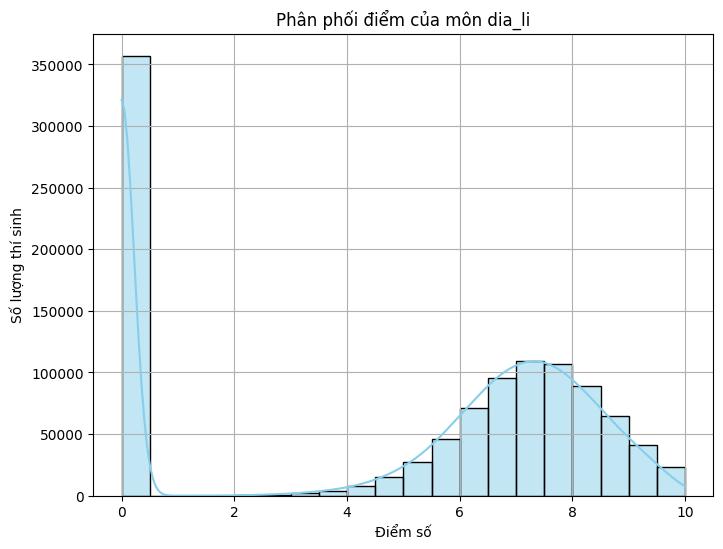

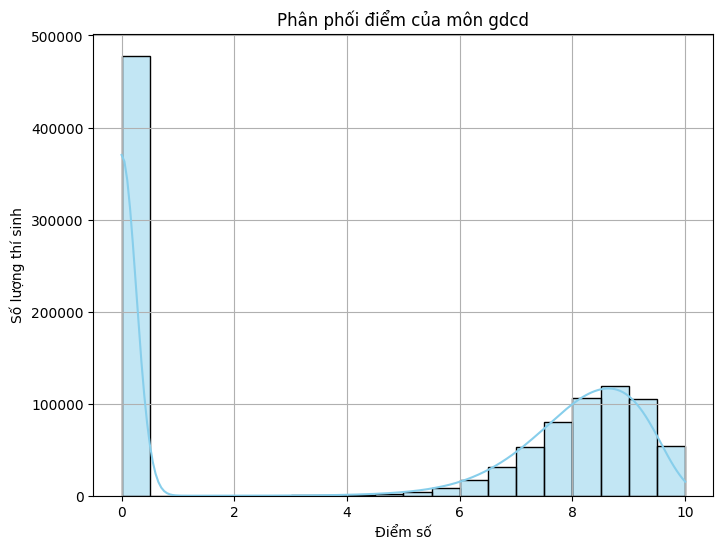

In [105]:
# Trực quan hóa dữ liệu đã cho
score_columns = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']

# Vẽ biểu đồ phân phối điểm cho từng môn học riêng biệt
for column in score_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True, color='skyblue', bins=20)
    plt.title(f'Phân phối điểm của môn {column}')
    plt.xlabel('Điểm số')
    plt.ylabel('Số lượng thí sinh')
    plt.grid(True)
    plt.show()

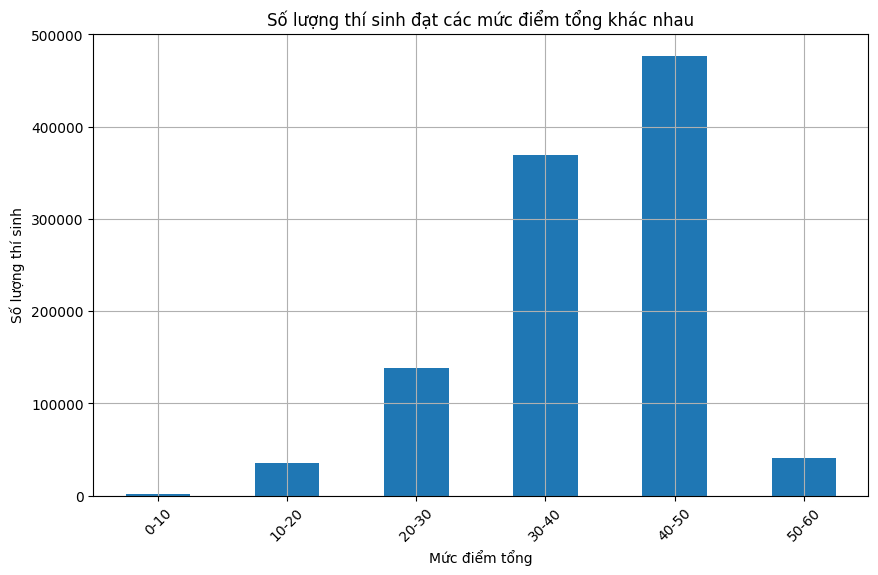

In [106]:
# Biểu đồ so sánh số lượng thí sinh đạt các mức điểm tổng khác nhau.
# Tính điểm tổng
df['tong_diem'] = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].sum(axis=1)
# Tạo các khoảng điểm tổng
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
df['muc_diem_tong'] = pd.cut(df['tong_diem'], bins=bins, labels=labels, include_lowest=True)
# Đếm số lượng thí sinh theo từng mức điểm
diem_tong_counts = df['muc_diem_tong'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
diem_tong_counts.plot(kind='bar')
plt.title('Số lượng thí sinh đạt các mức điểm tổng khác nhau')
plt.xlabel('Mức điểm tổng')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

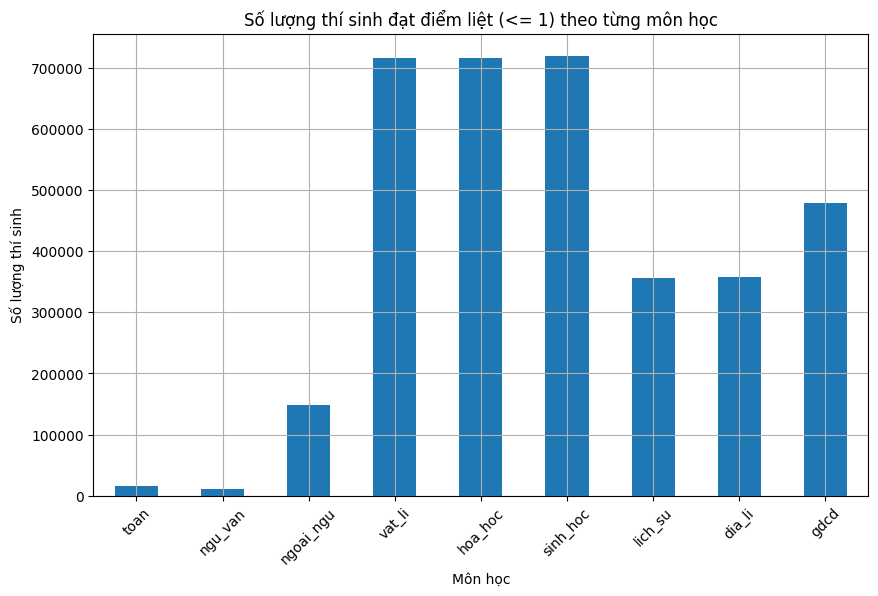

In [107]:
# Biểu đồ số lượng thí sinh đạt điểm liệt theo từng môn học.
liet_columns = []
for column in score_columns:
    df[f'{column}_liet'] = df[column].le(1).astype(int)
    liet_columns.append(f'{column}_liet')

# Đếm số lượng thí sinh đạt điểm liệt theo từng môn
liet_counts = df[liet_columns].sum()

plt.figure(figsize=(10, 6))
liet_counts.plot(kind='bar')
plt.title('Số lượng thí sinh đạt điểm liệt (<= 1) theo từng môn học')
plt.xlabel('Môn học')
plt.ylabel('Số lượng thí sinh')
plt.xticks(ticks=range(len(score_columns)), labels=score_columns, rotation=45)
plt.grid(True)
plt.show()

Mẫu ngẫu nhiên 1000 thí sinh từ tập dữ liệu gốc:
              sbd  tong_diem
79883     1080461      40.85
38703     1039042      41.40
1013405  59001141      23.65
610922   30012765      25.30
19936     1020137      42.60
Tổng số mẫu: 1000
****************************************************************************************************
Mẫu ngẫu nhiên 500 thí sinh đạt điểm tổng cao nhất:
             sbd  tong_diem
390422  19000267      55.65
482297  25015487      56.55
923949  52001210      55.65
338924  16003840      56.10
335454  16000364      56.35
Tổng số mẫu: 500
****************************************************************************************************
Mẫu ngẫu nhiên 300 thí sinh có ít nhất một môn bị điểm liệt:
              sbd  tong_diem  co_diem_liet
79883     1080461      40.85          True
38703     1039042      41.40          True
1013405  59001141      23.65          True
610922   30012765      25.30          True
19936     1020137      42.60          True
T

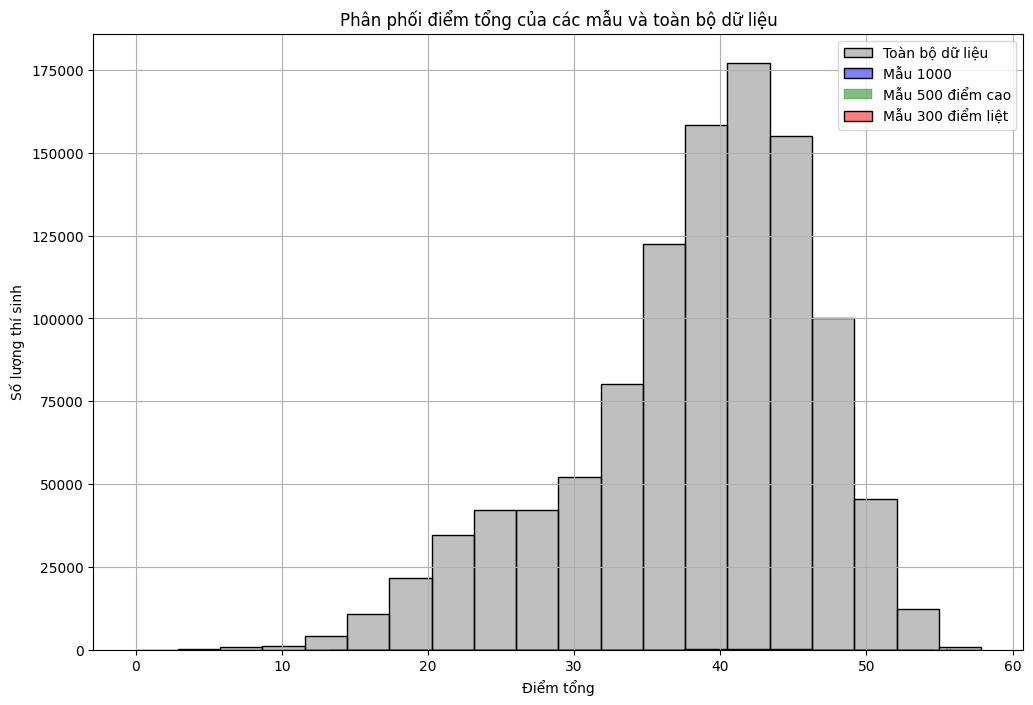

### Nhận xét về sự khác biệt giữa các mẫu so với tập dữ liệu gốc:
- **Mẫu 1000 thí sinh**: Do được lấy ngẫu nhiên từ toàn bộ dữ liệu, trung bình điểm các môn và phân phối điểm tổng của mẫu này nên tương đối tương đồng với toàn bộ dữ liệu gốc, với một số biến thiên ngẫu nhiên nhỏ.
- **Mẫu 500 thí sinh điểm cao nhất**: Trung bình điểm các môn cao hơn đáng kể so với toàn bộ dữ liệu, và phân phối điểm tổng tập trung ở các giá trị cao (thường > 30-40), phản ánh đặc trưng của nhóm này.
- **Mẫu 300 thí sinh có điểm liệt**: Trung bình điểm các môn thấp hơn so với toàn bộ dữ liệu, đặc biệt các môn có điểm liệt (như vat_li, hoa_hoc) có xu hướng thấp hơn, và phân phối điểm tổng thường tập trung ở các giá trị thấp (< 20-30), do ảnh hưởng của điểm liệt.


In [109]:
# Mô phỏng mẫu ngẫu nhiên (2 điểm, CLO 2)

# a. Sử dụng hàm random để mô phỏng nhiều mẫu ngẫu nhiên
# Lấy mẫu ngẫu nhiên 1000 thí sinh từ tập dữ liệu gốc.
# Lấy mẫu ngẫu nhiên 500 thí sinh đạt điểm tổng cao nhất.
# Lấy mẫu ngẫu nhiên 300 thí sinh có ít nhất một môn bị điểm liệt.

# b. Tổng hợp các đặc trưng của các mẫu ngẫu nhiên vừa tạo và đưa ra nhận xét
# Trung bình điểm từng môn của các mẫu so với toàn bộ dữ liệu.
# Phân phối điểm tổng của các mẫu.
# Nhận xét về sự khác biệt giữa các mẫu so với tập dữ liệu gốc.

# Tính điểm tổng và cột điểm liệt
df['tong_diem'] = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].sum(axis=1)
df['co_diem_liet'] = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].le(1).any(axis=1)

# a. Sử dụng hàm random để mô phỏng nhiều mẫu ngẫu nhiên

# 1. Lấy mẫu ngẫu nhiên 1000 thí sinh từ tập dữ liệu gốc
sample_1000 = df.sample(n=1000, random_state=42) if len(df) >= 1000 else df
print("Mẫu ngẫu nhiên 1000 thí sinh từ tập dữ liệu gốc:")
print(sample_1000[['sbd', 'tong_diem']].head())
print(f"Tổng số mẫu: {len(sample_1000)}")
print("*" * 100)

# 2. Lấy mẫu ngẫu nhiên 500 thí sinh đạt điểm tổng cao nhất
top_500 = df.nlargest(500, 'tong_diem')
sample_top_500 = top_500.sample(n=500, random_state=42) if len(top_500) >= 500 else top_500
print("Mẫu ngẫu nhiên 500 thí sinh đạt điểm tổng cao nhất:")
print(sample_top_500[['sbd', 'tong_diem']].head())
print(f"Tổng số mẫu: {len(sample_top_500)}")
print("*" * 100)

# 3. Lấy mẫu ngẫu nhiên 300 thí sinh có ít nhất một môn bị điểm liệt
students_with_liet = df[df['co_diem_liet']]
sample_liet_300 = students_with_liet.sample(n=300, random_state=42) if len(students_with_liet) >= 300 else students_with_liet
print("Mẫu ngẫu nhiên 300 thí sinh có ít nhất một môn bị điểm liệt:")
print(sample_liet_300[['sbd', 'tong_diem', 'co_diem_liet']].head())
print(f"Tổng số mẫu: {len(sample_liet_300)}")
print("*" * 100)

# b. Tổng hợp các đặc trưng của các mẫu ngẫu nhiên vừa tạo và đưa ra nhận xét

# Hàm tính trung bình điểm từng môn
def calculate_mean_scores(dataframe):
    return dataframe[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].mean()

# Tính trung bình điểm từng môn
mean_scores_all = calculate_mean_scores(df)
mean_scores_1000 = calculate_mean_scores(sample_1000)
mean_scores_top_500 = calculate_mean_scores(sample_top_500)
mean_scores_liet_300 = calculate_mean_scores(sample_liet_300)

# In trung bình điểm từng môn
print("Trung bình điểm từng môn của toàn bộ dữ liệu:")
print(mean_scores_all.round(2))
print("*" * 100)

print("Trung bình điểm từng môn của mẫu 1000 thí sinh:")
print(mean_scores_1000.round(2))
print("*" * 100)

print("Trung bình điểm từng môn của mẫu 500 thí sinh điểm cao nhất:")
print(mean_scores_top_500.round(2))
print("*" * 100)

print("Trung bình điểm từng môn của mẫu 300 thí sinh có điểm liệt:")
print(mean_scores_liet_300.round(2))
print("*" * 100)

# Phân phối điểm tổng của các mẫu
plt.figure(figsize=(12, 8))

# Phân phối điểm tổng của toàn bộ dữ liệu
sns.histplot(data=df, x='tong_diem', color='gray', label='Toàn bộ dữ liệu', alpha=0.5, bins=20)

# Phân phối điểm tổng của mẫu 1000
sns.histplot(data=sample_1000, x='tong_diem', color='blue', label='Mẫu 1000', alpha=0.5, bins=20)

# Phân phối điểm tổng của mẫu 500 điểm cao nhất
sns.histplot(data=sample_top_500, x='tong_diem', color='green', label='Mẫu 500 điểm cao', alpha=0.5, bins=20)

# Phân phối điểm tổng của mẫu 300 điểm liệt
sns.histplot(data=sample_liet_300, x='tong_diem', color='red', label='Mẫu 300 điểm liệt', alpha=0.5, bins=20)

plt.title('Phân phối điểm tổng của các mẫu và toàn bộ dữ liệu')
plt.xlabel('Điểm tổng')
plt.ylabel('Số lượng thí sinh')
plt.legend()
plt.grid(True)
plt.show()

# Nhận xét
print("### Nhận xét về sự khác biệt giữa các mẫu so với tập dữ liệu gốc:")
print("- **Mẫu 1000 thí sinh**: Do được lấy ngẫu nhiên từ toàn bộ dữ liệu, trung bình điểm các môn và phân phối điểm tổng của mẫu này nên tương đối tương đồng với toàn bộ dữ liệu gốc, với một số biến thiên ngẫu nhiên nhỏ.")
print("- **Mẫu 500 thí sinh điểm cao nhất**: Trung bình điểm các môn cao hơn đáng kể so với toàn bộ dữ liệu, và phân phối điểm tổng tập trung ở các giá trị cao (thường > 30-40), phản ánh đặc trưng của nhóm này.")
print("- **Mẫu 300 thí sinh có điểm liệt**: Trung bình điểm các môn thấp hơn so với toàn bộ dữ liệu, đặc biệt các môn có điểm liệt (như vat_li, hoa_hoc) có xu hướng thấp hơn, và phân phối điểm tổng thường tập trung ở các giá trị thấp (< 20-30), do ảnh hưởng của điểm liệt.")